# ch 10. file I/O 

python 코드로 파일을 읽고 쓰는 방법을 배워봅니다.  
특히 앞으로 정말 많이 다루게 될 csv 포맷의 파일을 다루는 방법을 배워봅니다.

## 텍스트 파일 입출력
파이썬을 이용한 데이터 분석을 공부하면서 정말 많이 사용해야하는 기능입니다.  
코드 상에서 파일을 읽고, 처리해서, 다시 파일로 출력하는 방법을 배워보겠습니다.

### 텍스트 파일 읽기
가장 기본인 ".txt" 확장자를 가진 파일을 읽는 법을 익혀보겠습니다.  
파일을 읽을 때에는 파이썬에 내장된 open 함수를 사용합니다.  
결과를 확인해보면 읽기 모드로 utf-8로 인코딩된 텍스트 파일을 열었다 정도로 이해하면 됩니다.

In [3]:
f = open("./data/helloworld.txt", encoding="utf-8")
f, type(f)

(<_io.TextIOWrapper name='./data/helloworld.txt' mode='r' encoding='utf-8'>,
 _io.TextIOWrapper)

이제 텍스트 파일을 한줄 한줄 읽어보겠습니다.

In [4]:
next(f)

'hello world!\n'

In [5]:
next(f)

'nice to meet you!'

In [6]:
next(f)

StopIteration: 

helloworld.txt 파일을 한 줄씩 읽어서 리턴해주는 걸 볼 수 있습니다. 이를 for 문으로 작성해보겠습니다.

In [7]:
f = open("./data/helloworld.txt", encoding="utf-8")
for line in f:
    print(line)

hello world!

nice to meet you!


한번 열어준 파일은 close를 해주는 것이 좋습니다.  with 문법을 사용하면 간단하게 작성할 수 있습니다.

In [8]:
with open("./data/helloworld.txt", encoding="utf-8") as fr:
    for line in fr:
        print(line.strip())

hello world!
nice to meet you!


###  텍스트 파일 쓰기

이제 파이썬 코드 상에서 처리한 데이터를 텍스트 파일에 써보겠습니다.  
이를 위해선 데이터를 쓸 새로운 파일을 만들어야 합니다.  
open("데이터를 쓸 파일명", "w") 명령어로 쓰기 모드로 파일을 열어줍니다.   
만약 파일명이 기존에 존재하는 파일이라면 덮어쓰고, 존재하지 않는 파일이라면 새 파일을 만들어줍니다.

In [9]:
write_file = open("./data/helloworld_new.txt", "w")
write_file, type(write_file)

(<_io.TextIOWrapper name='./data/helloworld_new.txt' mode='w' encoding='UTF-8'>,
 _io.TextIOWrapper)

write 명령어를 사용해서 데이터를 파일에 쓸 수 있습니다. 이 때 리턴되는 값은 문자열의 길이입니다. (큰 의미 없습니다.)

In [10]:
write_file.write("만나서 반갑습니다!\n")

11

helloworld_new.txt에 텍스트가 잘 쓰여졌는지 확인해보면 아직 비어있습니다.  
close 명령어로 파일을 닫아주어야 쓰기 작업이 마무리되기 때문입니다.  
파이썬에서 파일을 열어서 데이터를 썼다면 반드시 close를 호출해서 닫아주어야 데이터가 누락되지 않습니다.

In [11]:
write_file.close()

with 문을 이용하면 일일이 close를 호출하지 않아도 되서 깔끔하게 구현할 수 있습니다.

In [12]:
with open("./data/helloworld_new.txt", "w") as fw:
    fw.write("만나서 반갑습니다.\n")

### 텍스트 파일 덧붙이기
기존에 있던 텍스트 파일의 내용을 그대로 놔두고, 내용을 추가하고 싶으면 어떻게 해야할까요?  
파일을 열 때, append를 의미하는 "a" 모드로 연 뒤, 데이터를 쓰고, 닫아주면 됩니다.

In [13]:
with open("./data/helloworld_new.txt", "a") as fw:
    fw.write("앞으로 잘부탁드려요!")

### 연습 문제
"./data/helloworld.txt"의 텍스트를 모두 읽어와 대분자로 변경하여 "./data/helloworld_upper.txt"라는 파일에 써주세요.  
with 문을 사용해주세요  
escape sequence "\n"에 주의해주세요  
파일에 아래 스크린샷 처럼 텍스트가 쓰여져야 합니다.  

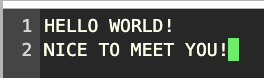

In [14]:
with open("./data/helloworld.txt") as fr:
    with open("./data/helloworld_upper.txt", "w") as fw:
        for line in fr:
            upper_line = line.upper()
            fw.write(f"{upper_line}")

## CSV 파일 입출력

- csv는 "comma separated value"라는 뜻으로 "," 를 기준으로 데이터를 쓰는 포맷입니다.  
- separator로 tab("\t")을 사용할 경우엔 tsv 파일이라고 부르기도 합니다.
- 데이터 셋을 저장하는 가장 기본적인 포맷이며, 현업에서도 많이 사용됩니다. (물론 csv는 데이터 압축 효과가 없어서 찐 대용량 데이터들은 apache parquet, avro 같은 포맷을 사용하기도 합니다. 이는 나중에 필요할 때 공부하면 됩니다.)

### CSV 파일 읽기
- "./data/titanic_train.csv" 파일을 메모장으로 열어보겠습니다.

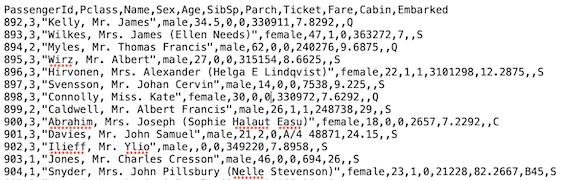
- 해당 데이터 셋은 나중에 데이터 분석 실습 과제로 진행할 타이타닉 탑승자들의 신상 정보와 생존 여부를 기록한 데이터 셋입니다.  
- 첫 번째 줄은 각 열이 무슨 데이터인지를 알려줍니다. 
- PassengerId,Pclass(좌석 등급),Name,Sex,Age,SibSp(형제나 배우자의 탑승 유무),Parch(부모나 자식 탑승 유무), Ticket, Fare, Cabin(승무원 번호, 승무원이 아니면 비어있음), Embarked(어디서 승선했는지)
- 그 다음은 한 행씩 승객 한명의 데이터가 ","를 기준으로 이어붙여져서 쓰여있습니다.
- 파이썬에서 csv 파일을 쉽게 다루기 위해서 csv라는 내장 라이브러리를 제공합니다. 이를 이용해서 csv 파일을 읽어보겠습니다.

In [15]:
import csv

with open("./data/titanic_train.csv") as fr:
    reader = csv.reader(fr)
    for i, line in enumerate(reader):
        if i > 5:
            break
        print(line)
        print(line[1])

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Survived
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
0
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
1
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
1
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
1
['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
0


- next로 반복을 돌려보면 csv 파일의 각 행이 배열의 형태로 출력됩니다.
- 이를 for문으로 작성해보겠습니다. 너무 많은 행이 출력되면 보기 불편하니, 앞에서부터 5행만 출력해보겠습니다. 그리고 각 행에서 승객의 아이디, 좌석 등급, 이름, 성별만 한번 출력해보겠습니다.
- import csv는 한번 호출했으니, 다시 호출하지 않아도 사용할 수 있습니다.

In [16]:
with open("./data/titanic_train.csv") as fr:
    reader = csv.reader(fr)
    for i, row in enumerate(reader):
        if i > 5:
            break
        # 승객의 아이디, 좌석 등급, 이름, 성별만 골라서 출력
        print(row[0], row[1], row[2], row[4])

PassengerId Survived Pclass Sex
1 0 3 male
2 1 1 female
3 1 3 female
4 1 1 female
5 0 3 male


### CSV 파일 쓰기
- 읽기와 마찬가지로 csv 파일을 쓸 때 python csv 라이브러리를 사용하면 편하게 쓸 수 있습니다.
- titanic_sample에서 승객의 아이디, 좌석 등급, 이름, 성별만 골라서 "./data/titanic_info.csv"라는 파일에 써보겠습니다.
- csv writer의 writerow를 사용하면 굉장히 편리합니다.

In [17]:
 with open("./data/titanic_train.csv") as fr:
    reader = csv.reader(fr)
    with open("./data/titanic_train_copy.csv", "w") as fw:
        writer = csv.writer(fw)
        for i, row in enumerate(reader):
            writer.writerow(row)

### 연습문제
Cabin이 빈 값이 아닌 row들만 cabin.csv에 출력해보세요.
이 때, PassengerId, Survived, Pclass, Sex, Cabin 컬럼만 포함하세요.

In [18]:
 with open("./data/titanic_train.csv") as fr:
    reader = csv.reader(fr)
    with open("./data/cabin.csv", "w") as fw:
        writer = csv.writer(fw)
        for i, row in enumerate(reader):
            cabin = row[10]
            if cabin:
                writer.writerow([row[0], row[1], row[2], row[4], cabin])